In [1]:
import pdb

import numpy   as np
import pandas  as pd
import seaborn as sns; sns.set(style="ticks", palette="pastel")

from matplotlib           import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use({  'figure.figsize'    :(12,4),
                 'axes.titlesize'    :20,
                 'axes.titleweight'  :True,
                 'lines.markersize'  :10,
                 'axes.grid'         :True,
                 'axes.labelsize'    :16,
                 'xtick.labelsize'   :14,
                 'xtick.major.width' :True,
                 'ytick.labelsize'   :14,
                 'ytick.major.width' :True, 
                 'lines.linewidth'   :2.5   })

def pseudo_inv (X: np.array, Y: np.array)->np.array:
    """
      Compute the pseudoinverse matrix for regression/classification
        -> pinv = (X^T X)^-1 X^T y
        
      @param X: -> shape = (n_samples,k_features)
      @param Y: -> shape = (n_samples,1)
      
      @return pinv: -> shape = (k_features,1)
    """
    pinv = np.dot( X.T,X )
    pinv = np.linalg.inv(pinv)
    pinv = np.dot( pinv,X.T )
    pinv = np.dot( pinv,Y   )
    
    return pinv

def extend_x(X: np.array)->np.array:
    """
      Appends a colum of ones to the X matrix
        -> X_ex = [X Ones]
      
      @param X: -> shape = (n_samples,k_features)
      
      @return X_ex: -> shape = (n_samples,k_features+1)
    """
    ones = np.ones( X.shape[0] )[:,np.newaxis]
    
    return np.concatenate( (X,ones), axis=-1 ).copy()

def plot_varrows( x,y1,y2,alpha=1,color='black' ):
    for i,j,k in zip( x,y1,y2 ):
        plt.arrow( i,j, 0,k-j,alpha=alpha,color=color )

def motivation( data,experiment ):
    title = experiment.replace(', ','-')
    y     = np.zeros( data.shape[0] )
    
    plt.figure( title )
    sns.scatterplot( x='X', y=y, hue='Y', data=data,
                      palette =['forestgreen','darkblue'],
                      s       =400,
                      alpha   =.8)
    plt.title(title)
    plt.savefig('data_1D_2Classes.png',dpi=120)
    
    plt.figure( title + ' etiquetas' )
    sns.scatterplot( x='X', y='Y', hue='Y', data=data,
                      palette=['forestgreen','darkblue'],
                      s      =400,
                      alpha  =.8)
    plt.savefig('data_1D_2Classes_pLab.png',dpi=120)
    plt.show()
    

def planes(data,experiment,lines):
    title    = experiment.replace(', ','-') + u' planos separación'
    nlines   = lines.shape[0]
    min, max = data['X'].min(), data['X'].max()
    min, max = min + 2*min , max + 0.1*max
    
    xline  = np.linspace( min,max,100 )[np.newaxis]
    ylines = np.dot( lines[:,0:1],xline ).T
    ylines = ylines + lines[:,1]
    
    plt.figure( title )
    sns.scatterplot( x='X', y='Y', hue='Y', data=data,
                      palette=['forestgreen','darkblue'],
                      alpha=.8, s=400)
    plt.plot( np.tile( xline,(nlines,1) ).T, ylines)
    plt.title(title)
    
    plt.show()

def planes_predict(data,experiment,lines):
    title    = experiment.replace(', ','-') + u' planos predicción'
    
    x = data['X'].values[np.newaxis]
    y = np.dot( lines[:,0:1],x ).T
    y = y + lines[:,1]
    
    plt.figure( title )
    plot_varrows( x.ravel(),
                  data['Y'].values,    
                  y[:,0],
                  alpha=1,color='black' )
    
    sns.scatterplot( x='X', y='Y', hue='Y', data=data,
                      palette=['forestgreen','darkblue'],
                      alpha=.8,s=400)
    plt.plot( x.T, y)
    plt.title(title)
    
    plt.savefig('data_1D_pseudoinv_001.png',dpi=120)
    plt.show()

def threshold(data,thre=0.0,comparison=0):
    if comparison==0:
        l = data >= thre
    else:
        l = data < thre
    return (-2*l+1).copy()

def empiric_decision(X,Y,lines,thre,signs):
    y = np.dot( X,lines[:,0:1].T )
    y = y + lines[:,1]
    
    L = list(  map( lambda z: threshold(z[0],z[1],z[2]), zip( y.T,thre,signs )  )  )
    L = np.array(L).T
    
    plt.pcolormesh(L==-Y,edgecolors='k', linewidth=.5,cmap='cool')
        
    index = np.arange( L.shape[1] )
    plt.xticks(  index +.5, [ "Modelo-%d"%i for i in index ], fontsize=10  )
    
    ax = plt.gca()
    #ax.xticklabels()
    ax.set_aspect(.05)
    plt.gca().invert_yaxis()
    plt.show()
    print(np.array(Y).T)

def pseudoinverse_train(X,Y,N):
    X_ext = extend_x(X)
    W     = pseudo_inv(X_ext, Y)
    
    return W.copy()

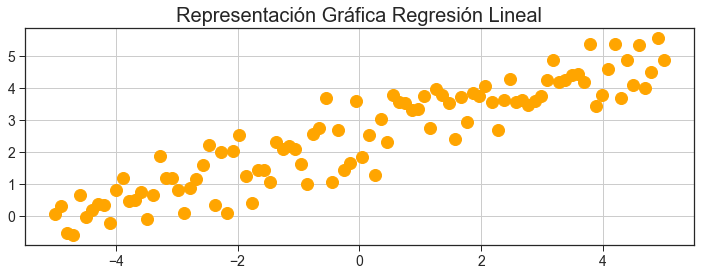

In [2]:
N     = 100
x     = np.linspace(-5,5,N)
y     = 0.5*x + 2.5
y_err = y + np.random.normal(0,0.6,N)

plt.plot( x,y_err , 'o', markersize=12, color='orange')
plt.title("Representación Gráfica Regresión Lineal")
plt.savefig("Regresion.png",dpi=120)
plt.show()

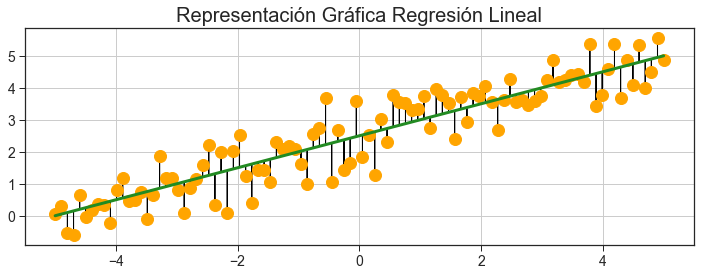

In [3]:
plt.plot( x,y_err , 'o', markersize=12, color='orange')
plt.plot( x,y     , '-', linewidth =3 , color='forestgreen' )
plot_varrows( x, y_err, y,              color='black' )
plt.title("Representación Gráfica Regresión Lineal")
plt.savefig("Regresion distancias.png",dpi=120)
plt.show()

In [6]:
pseudo_inv( extend_x(x[:,np.newaxis]),y_err )

array([0.50685545, 2.47835659])

In [22]:
params                     = {}
PATH                       = '/home/omarpr/git/machine_learning/data/'
params['fname_uninormals'] = 'CNIB 2020 TWO UNIV NORMALS 2.csv'


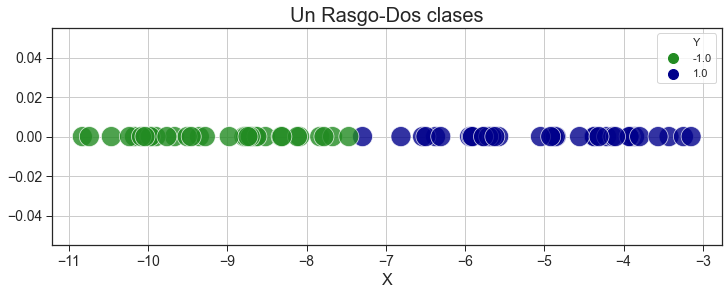

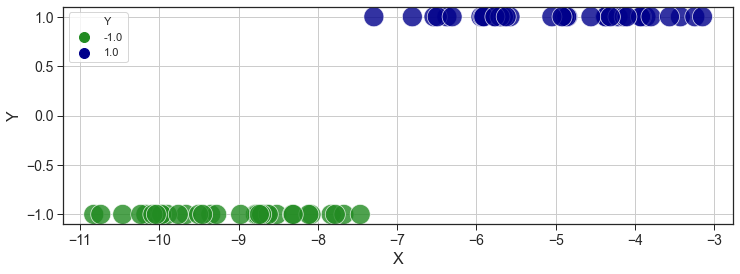

In [23]:
data  = pd.read_csv( PATH+params['fname_uninormals'] )

motivation    (data,'Un Rasgo, Dos clases')

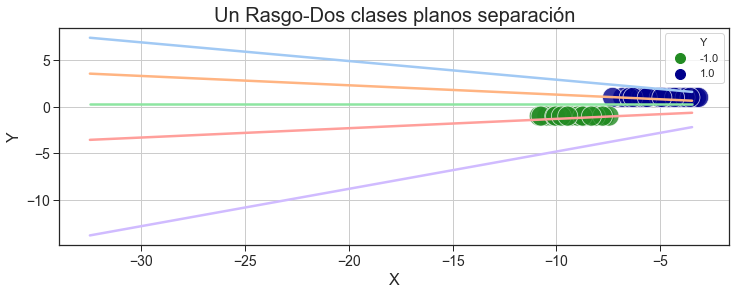

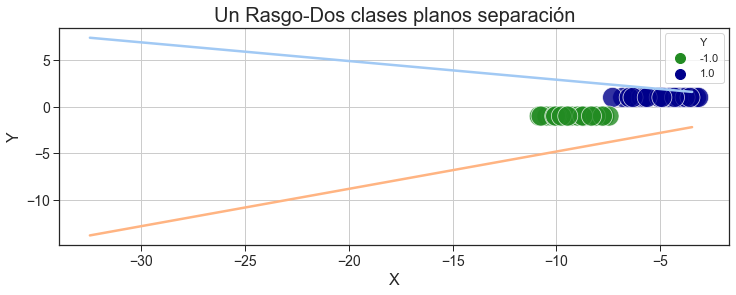

In [24]:
lines = np.array([ [-0.2  , 0.9  ],
                   [-0.1  , 0.3  ],
                   [ 0.0  , 0.3  ],
                   [ 0.1  ,-0.3  ],
                   [ 0.4  ,-0.8  ] ])                   



planes        (data,'Un Rasgo, Dos clases',lines)
planes        (data,'Un Rasgo, Dos clases',lines[ [0,-1] ])

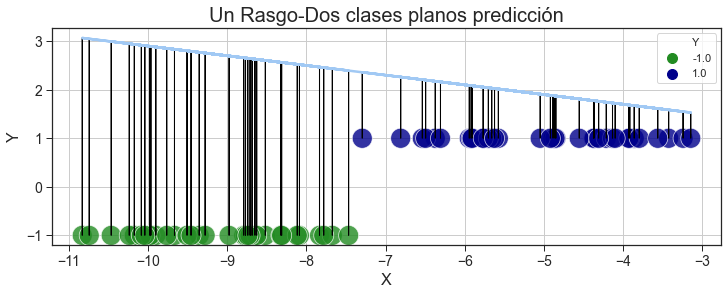

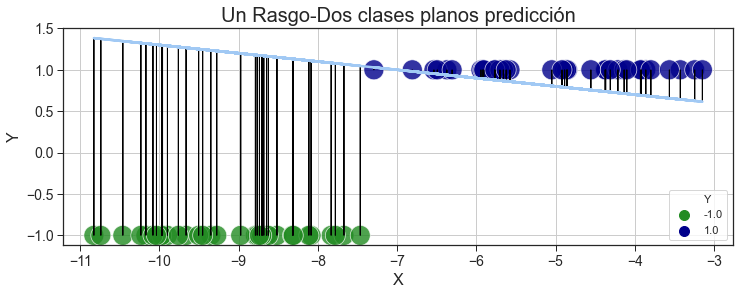

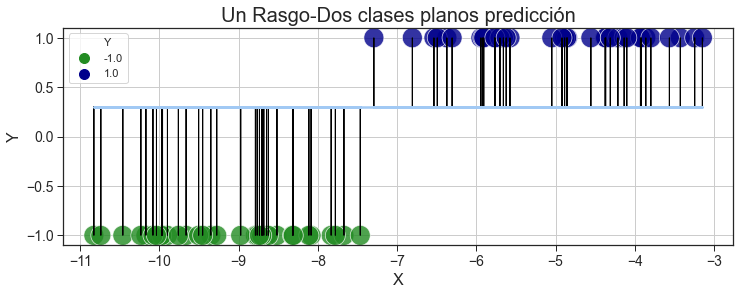

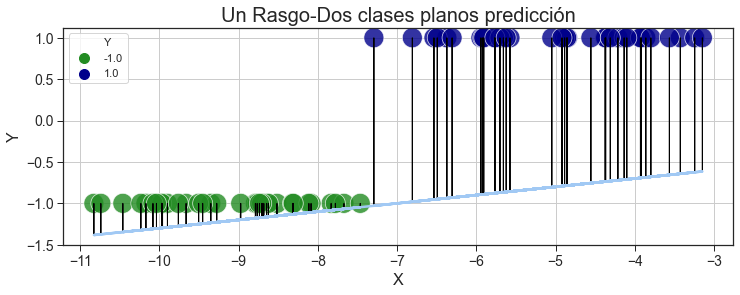

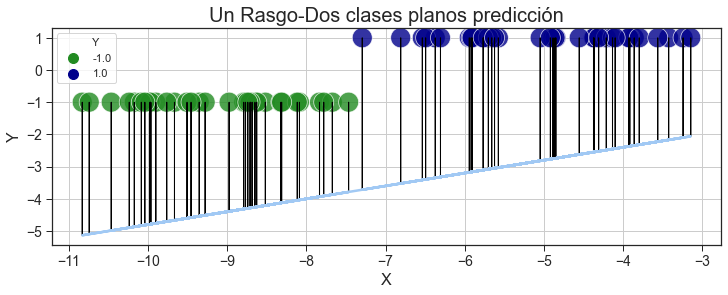

In [25]:
planes_predict( data, 'Un Rasgo, Dos clases', lines[ [0] ])
planes_predict( data, 'Un Rasgo, Dos clases', lines[ [1] ])
planes_predict( data, 'Un Rasgo, Dos clases', lines[ [2] ])
planes_predict( data, 'Un Rasgo, Dos clases', lines[ [3] ])
planes_predict( data, 'Un Rasgo, Dos clases', lines[ [4] ])

In [26]:
N     = 40

X = data.loc[:,['X']].values
Y = data.loc[:,['Y']].values

P     = X.shape[0]-N
index = np.arange( X.shape[0] ); np.random.shuffle(index)

X_Train, Y_Train = X[ index[  :N] ], Y[ index[  :N] ]
X_Test , Y_Test  = X[ index[-P: ] ], Y[ index[-P: ] ]

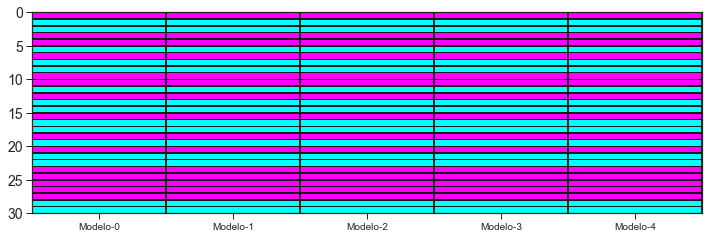

[[ 1. -1. -1.  1.  1. -1.  1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1.
   1. -1.  1. -1. -1.  1.  1.  1.  1.  1. -1. -1.]]


In [27]:
thre, sign = [.5, .1, .3, -0.15, 0], [0,0,0,-1,-1]

empiric_decision(X_Test,Y_Test,lines,thre, sign)

In [28]:
W = pseudoinverse_train(X_Train,Y_Train,N)
W

array([[0.37633237],
       [2.6689796 ]])

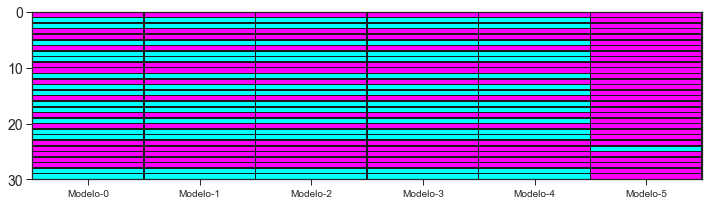

[[ 1. -1. -1.  1.  1. -1.  1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1.
   1. -1.  1. -1. -1.  1.  1.  1.  1.  1. -1. -1.]]


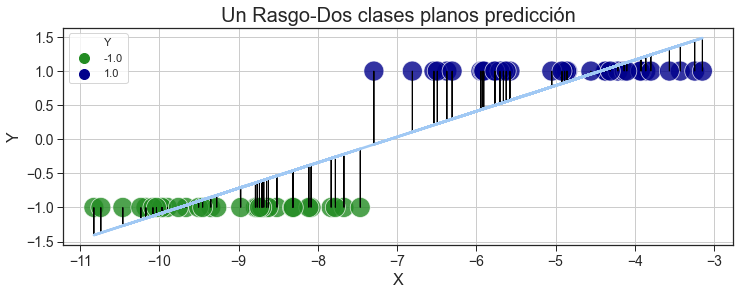

$$y(x) = -0.2x +0.9$$
$$y(x) = -0.1x +0.3$$
$$y(x) = 0.0x +0.3$$
$$y(x) = 0.1x -0.3$$
$$y(x) = 0.4x -0.8$$


In [29]:
empiric_decision( X_Test,Y_Test, 
                    np.concatenate( (lines,W.T) ), 
                    thre + [0]                   ,
                    sign + [0]
                )

planes_predict( data, 'Un Rasgo, Dos clases', W.T )

ecs = ["$$y(x) = %.1fx %+ .1f$$"%(tuple(i)) for i in lines]
for e in ecs:
    print(e)

In [30]:
threshold( np.dot( extend_x(X_Test),W ), comparison=1 ) == Y_Test

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [31]:
def plot_2D_classes( X, Y ):
    plt.figure()
    sns.scatterplot( x=X[:,0], y=X[:,1], hue=Y, palette=['forestgreen','darkblue'])
    
    fig = plt.figure()
    ax  = fig.add_subplot(111, projection='3d')
    
    mask = Y == -1
    ax.scatter( X[:,0][ mask], X[:,1][ mask], Y[ mask], color='forestgreen' )
    ax.scatter( X[:,0][~mask], X[:,1][~mask], Y[~mask], color='darkblue' )
    
    ax.view_init(azim=-20, elev=50)
    ax.set_xlabel('X_1')
    ax.set_ylabel('X_2')
    ax.set_zlabel('Y')
    
    plt.show()

def plot_decision_plane( X, Y, W ):
    plt.figure()
        
    fig = plt.figure()
    ax  = fig.add_subplot(111, projection='3d')
    
    mask = Y == -1
    ax.scatter( X[:,0][ mask], X[:,1][ mask], Y[ mask], color='forestgreen' )
    ax.scatter( X[:,0][~mask], X[:,1][~mask], Y[~mask], color='darkblue' )
    
    ax.view_init(azim=75, elev=10)
    ax.set_xlabel('X_1')
    ax.set_ylabel('X_2')
    ax.set_zlabel('Y')
    
    xx, yy = np.meshgrid( np.linspace( X[:,0].min(),X[:,0].max(),15 ),
                          np.linspace( X[:,1].min(),X[:,1].max(),15 )  )
    sh     = np.array( xx.shape ) 
    
    point  = np.array([1, 0, -1])
    normal = pseudo_inv( extend_x( X ),Y )
    
    d = -point.dot(normal)
    z = (-normal[0] * xx - normal[1] * yy - d) / normal[2]
        
    ax.plot_surface( xx, yy, z, cmap='inferno', facecolors=plt.cm.inferno(  (z - z.min() )/( z-z.min() ).max()  ), alpha=.4 )
    plt.show()

In [32]:
params['fname_binormals'] = 'CNIB 2020 TWO BIV NORMALS.csv'

data = pd.read_csv( PATH+params['fname_binormals'] )
X    = data.loc[ :,['X_1','X_2'] ].values
Y    = data['Y'  ].values.astype('int')

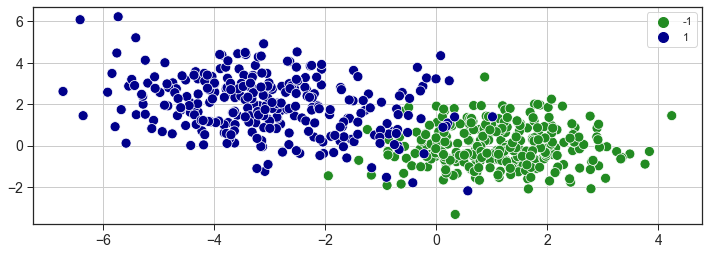

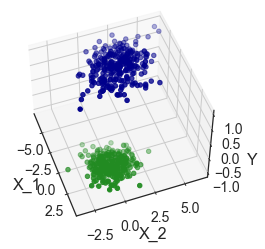

In [33]:
plot_2D_classes( X, Y )
    
N     = 200
P     = X.shape[0]-N
index = np.arange( X.shape[0] ); np.random.shuffle(index)

X_Train, Y_Train = X[ index[  :N] ], Y[ index[  :N] ]
X_Test , Y_Test  = X[ index[-P: ] ], Y[ index[-P: ] ]

<Figure size 864x288 with 0 Axes>

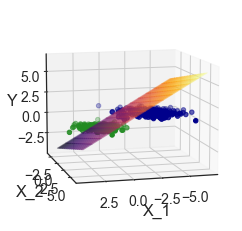

In [36]:
W = pseudo_inv( extend_x(X_Train),Y_Train )

plot_decision_plane( X_Test,Y_Test,W )

In [38]:
L = threshold( np.dot( extend_x(X_Test),W ), comparison=1 )
L==Y_Test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,